
# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0


# Correlation

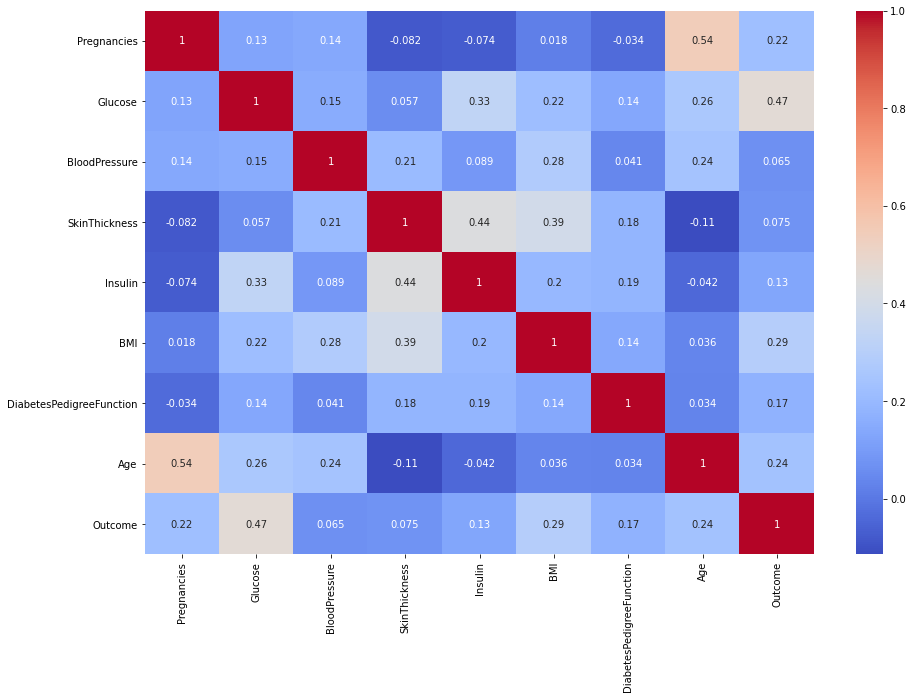

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

# Histplot

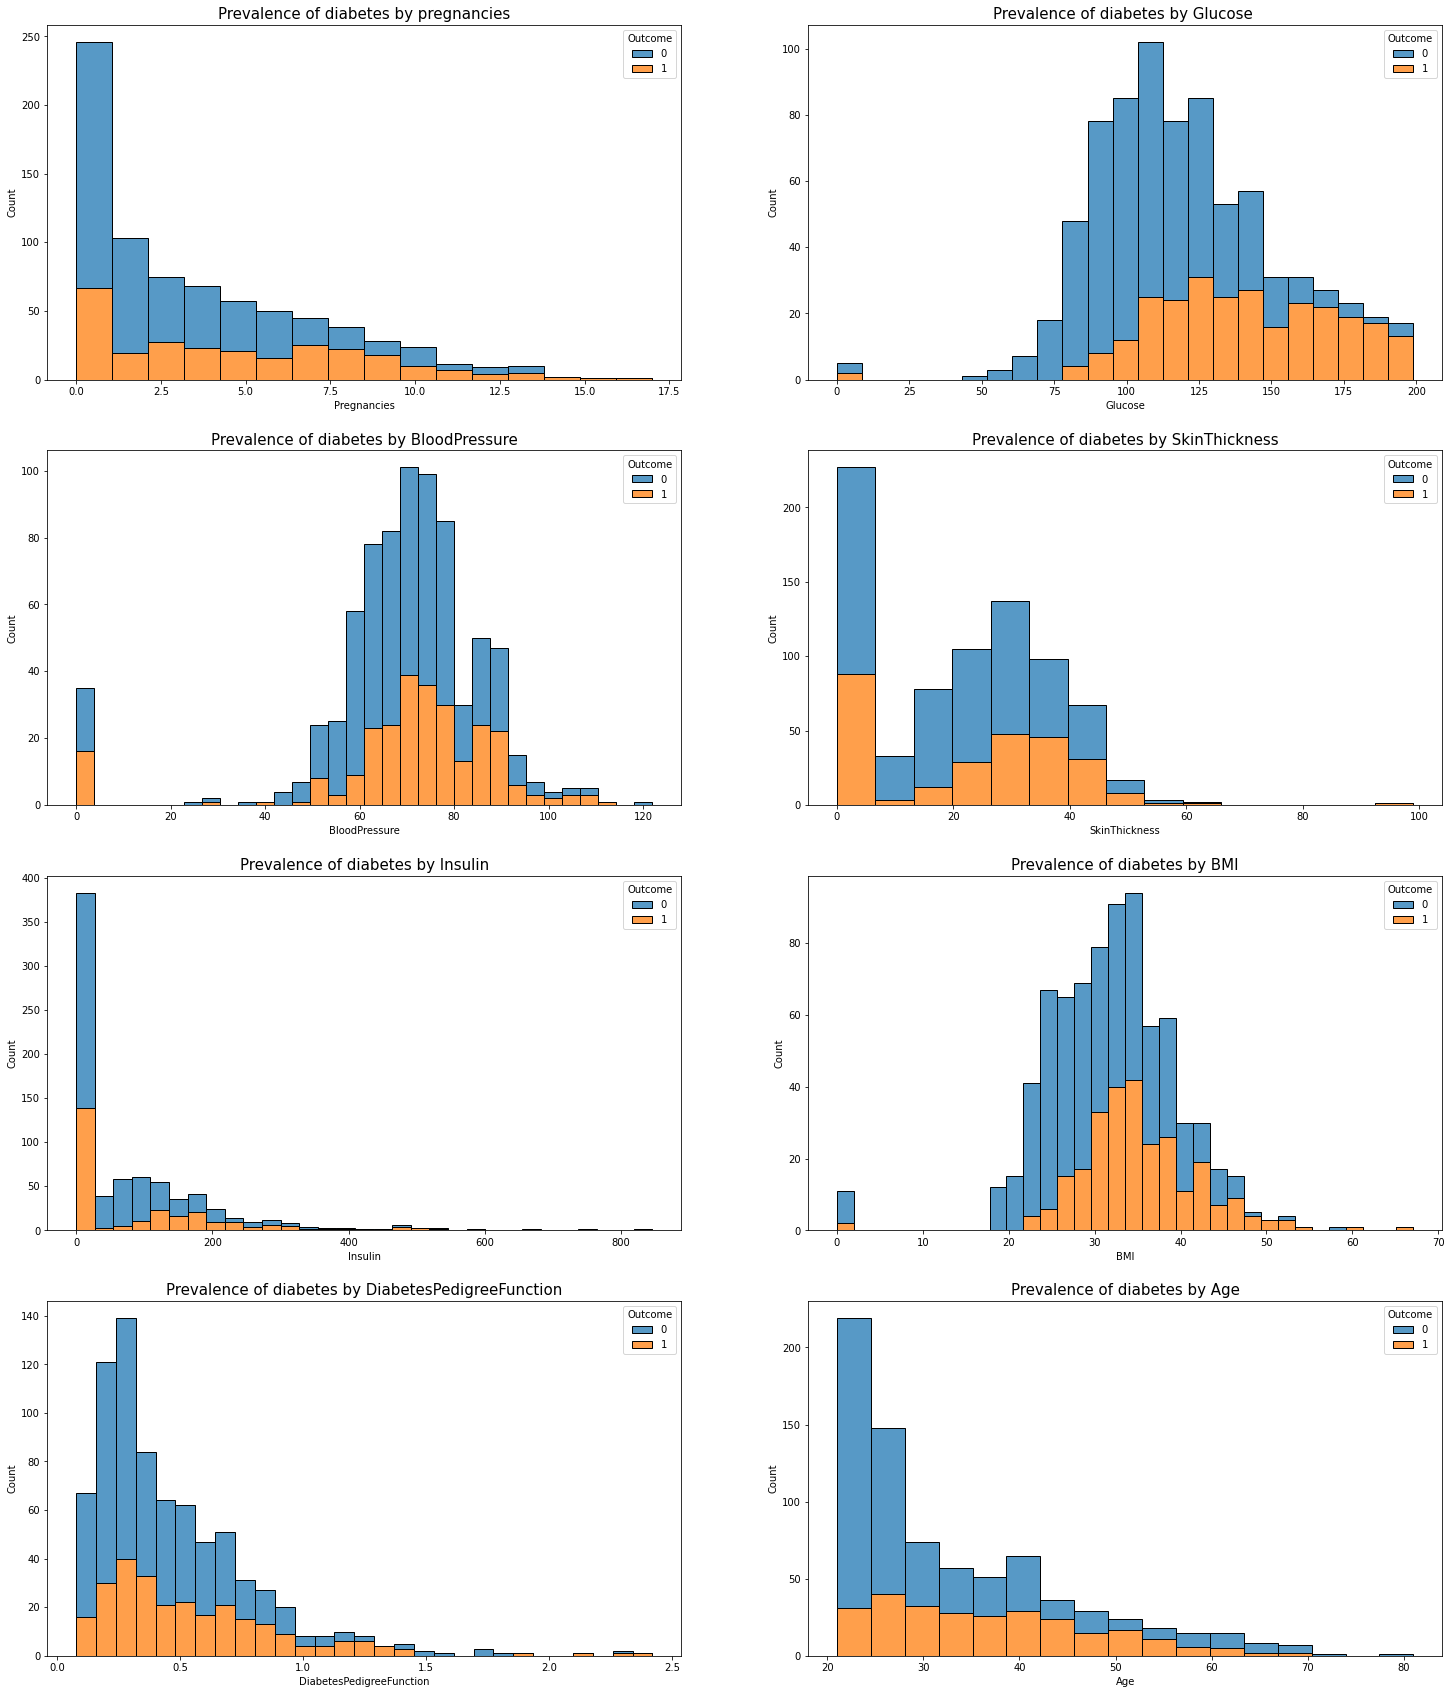

In [ ]:

plt.figure(figsize=(25,30))
plt.subplot(4,2,1)
plt.title('Prevalence of diabetes by pregnancies',fontsize=15)
sns.histplot(x = df['Pregnancies'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,2)
plt.title('Prevalence of diabetes by Glucose ',fontsize=15)
sns.histplot(x = df['Glucose'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,3)
plt.title('Prevalence of diabetes by BloodPressure',fontsize=15)
sns.histplot(x = df['BloodPressure'], hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,4)
plt.title('Prevalence of diabetes by SkinThickness',fontsize=15)
sns.histplot(x = df['SkinThickness'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,5)
plt.title('Prevalence of diabetes by Insulin',fontsize=15)
sns.histplot(x = df['Insulin'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,6)
plt.title('Prevalence of diabetes by BMI',fontsize=15)
sns.histplot(x = df['BMI'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,7)
plt.title('Prevalence of diabetes by DiabetesPedigreeFunction',fontsize=15)
sns.histplot(x = df['DiabetesPedigreeFunction'],hue = df['Outcome'],multiple="stack")

plt.subplot(4,2,8)
plt.title('Prevalence of diabetes by Age',fontsize=15)
sns.histplot(x = df['Age'],hue = df['Outcome'],multiple="stack")

# Boxplot for checking outliers

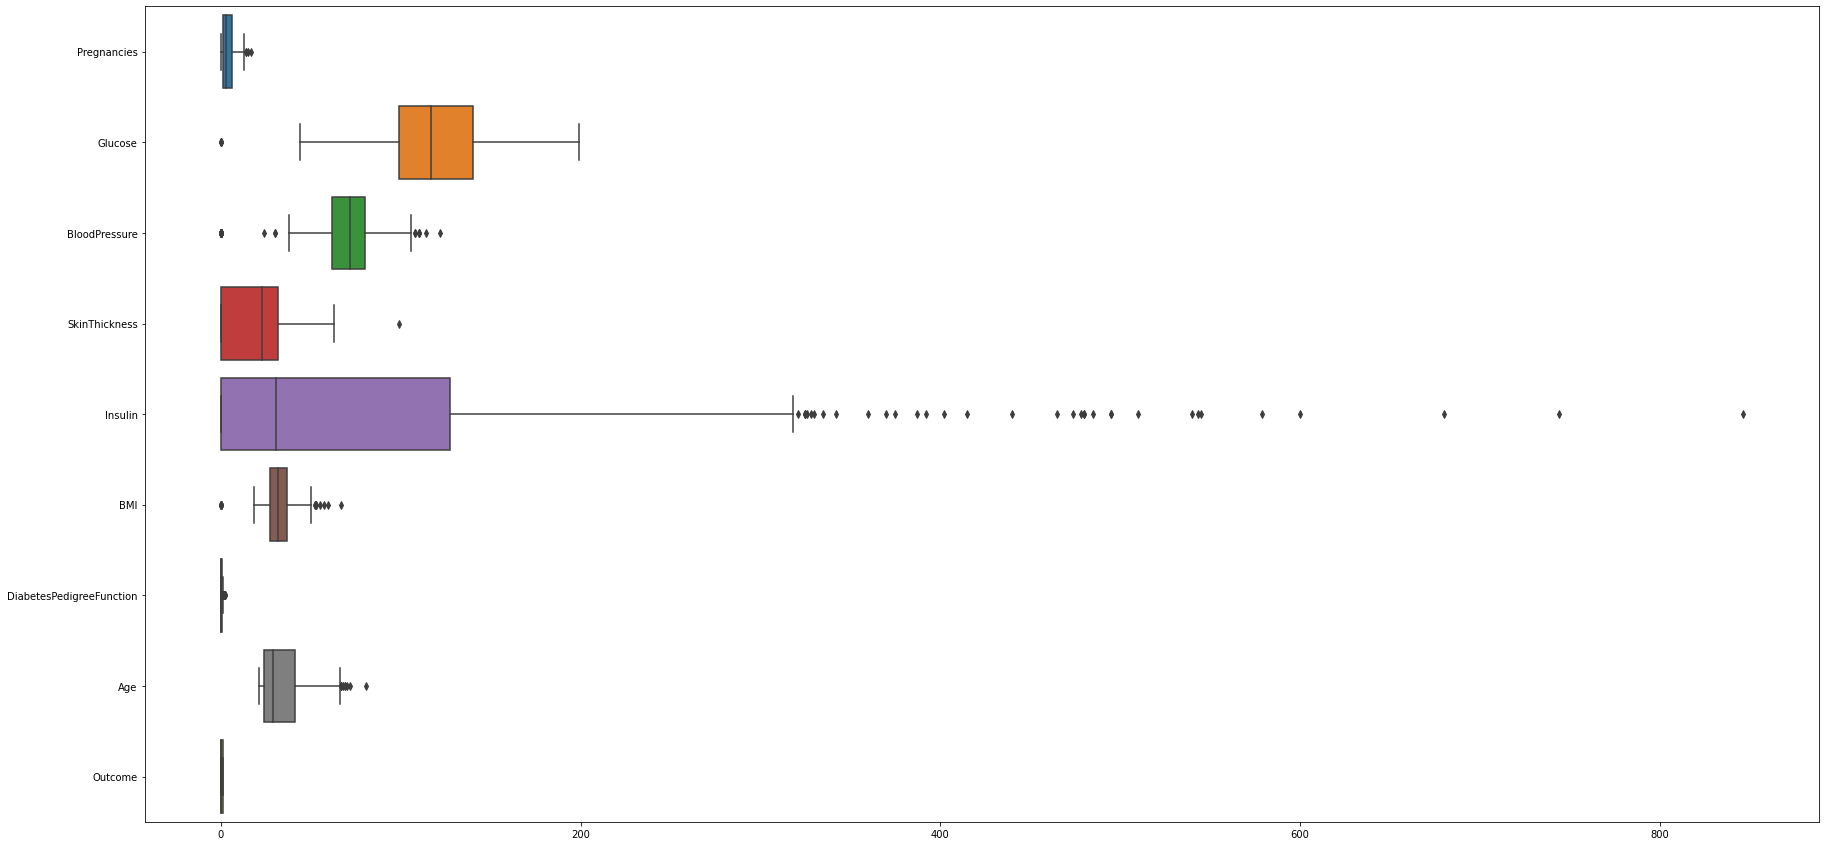

In [ ]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df, orient="h")

In general, 20 to 45 aged people have more chance of heart attack.

Blood pressure 60 to 80

skin thickness with 0 have more chances

**insulin with 0 have more chances**

BMI with 30 to 40

Diabetiespedegreefunction with 0.1 to 0.7

zero pregnensies have more chances

glucose 110 to 175

In [ ]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))


# Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier',]
value = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'SVC': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8246753246753247
KNeighborsClassifier 0.7532467532467533
SVC 0.7922077922077922
DecisionTreeClassifier 0.7987012987012987
RandomForestClassifier 0.7922077922077922


In [ ]:
classifier = LogisticRegression(C=1.0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predi = classifier.predict(x_test)

In [ ]:
calculation = pd.DataFrame(np.c_[y_test,y_predi], columns = ["Original","Predict"])
calculation

,Original,Predict
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,1
152,0,0


In [ ]:
cm = confusion_matrix(y_test, y_predi)
print(cm)
accuracy_score(y_test, y_predi)

[[98  9]
 [18 29]]


0.8246753246753247

# Visualizing Best fit model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


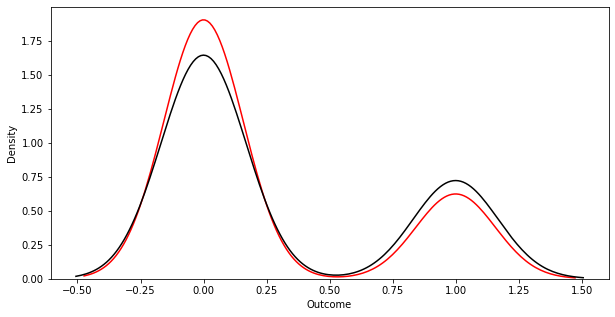

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(y_predi, label = 'Predicted',hist=False,color='r')
sns.distplot(y_test, label = 'Actual',hist=False,color='k')